# **Practical No: 4**

### **AIM:** Classify the Hand-Written digits using SOM networks.

### **CODE and OUTPUT**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from imageio import imwrite
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageChops


## What are SOM?
In brief, Self-organizing maps are a type of artificial neural network based on competitive learning (at variance to error-correcting learning typical of other NNs). The idea is to iteratively adapt a connected two-dimensional matrix of vectors (or nodes) to the higher-dimensional topology of the input dataset. At each cycle, a node is selected and its elements (the weights) are updated, together with those of its neighbors, to approach a randomly chosen datapoint from the training set. The competitive element comes into play during the update stage, since the closest node (according to a chosen metric) to the extracted datapoint is selected for the weights update at each iteration.

SOMs are particularly suited for cases where low-dimensional manifolds are hidden in higher dimensions and are often used together and/or competing with other dimensionality reduction methods and in particular Principal Component Analysis (PCA) for which it could be seen as a non-linear generalization: an exhaustive explanation of SOM's advantages and disadvantages, however, is beyond the scope of this notebook, but there are plenty of resources online for those who would like to know more.

I've used [this](http://https://github.com/fcomitani/SimpSOM) implementation of Kohonen Self-Organizing Maps

In [ ]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17087 sha256=8cbc7be6855637475f7078137a308e37c556f22c385b199163aca0003a12036d
  Stored in directory: /tmp/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [ ]:
import SimpSOM as sps

## Data preparation

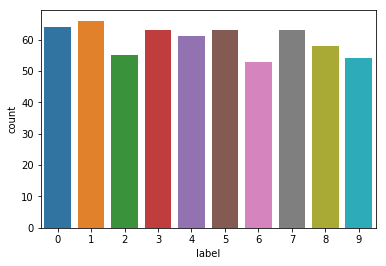

In [ ]:
np.random.seed(0)

# get part of the dataset
train = pd.read_csv('../input/Kannada-MNIST/train.csv')
train = train.sample(n=600, random_state=0)
labels = train['label']
train = train.drop("label",axis=1)

# check distribution
sns.countplot(labels)

# standardization of a dataset
train_st = StandardScaler().fit_transform(train.values)

## Training SOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


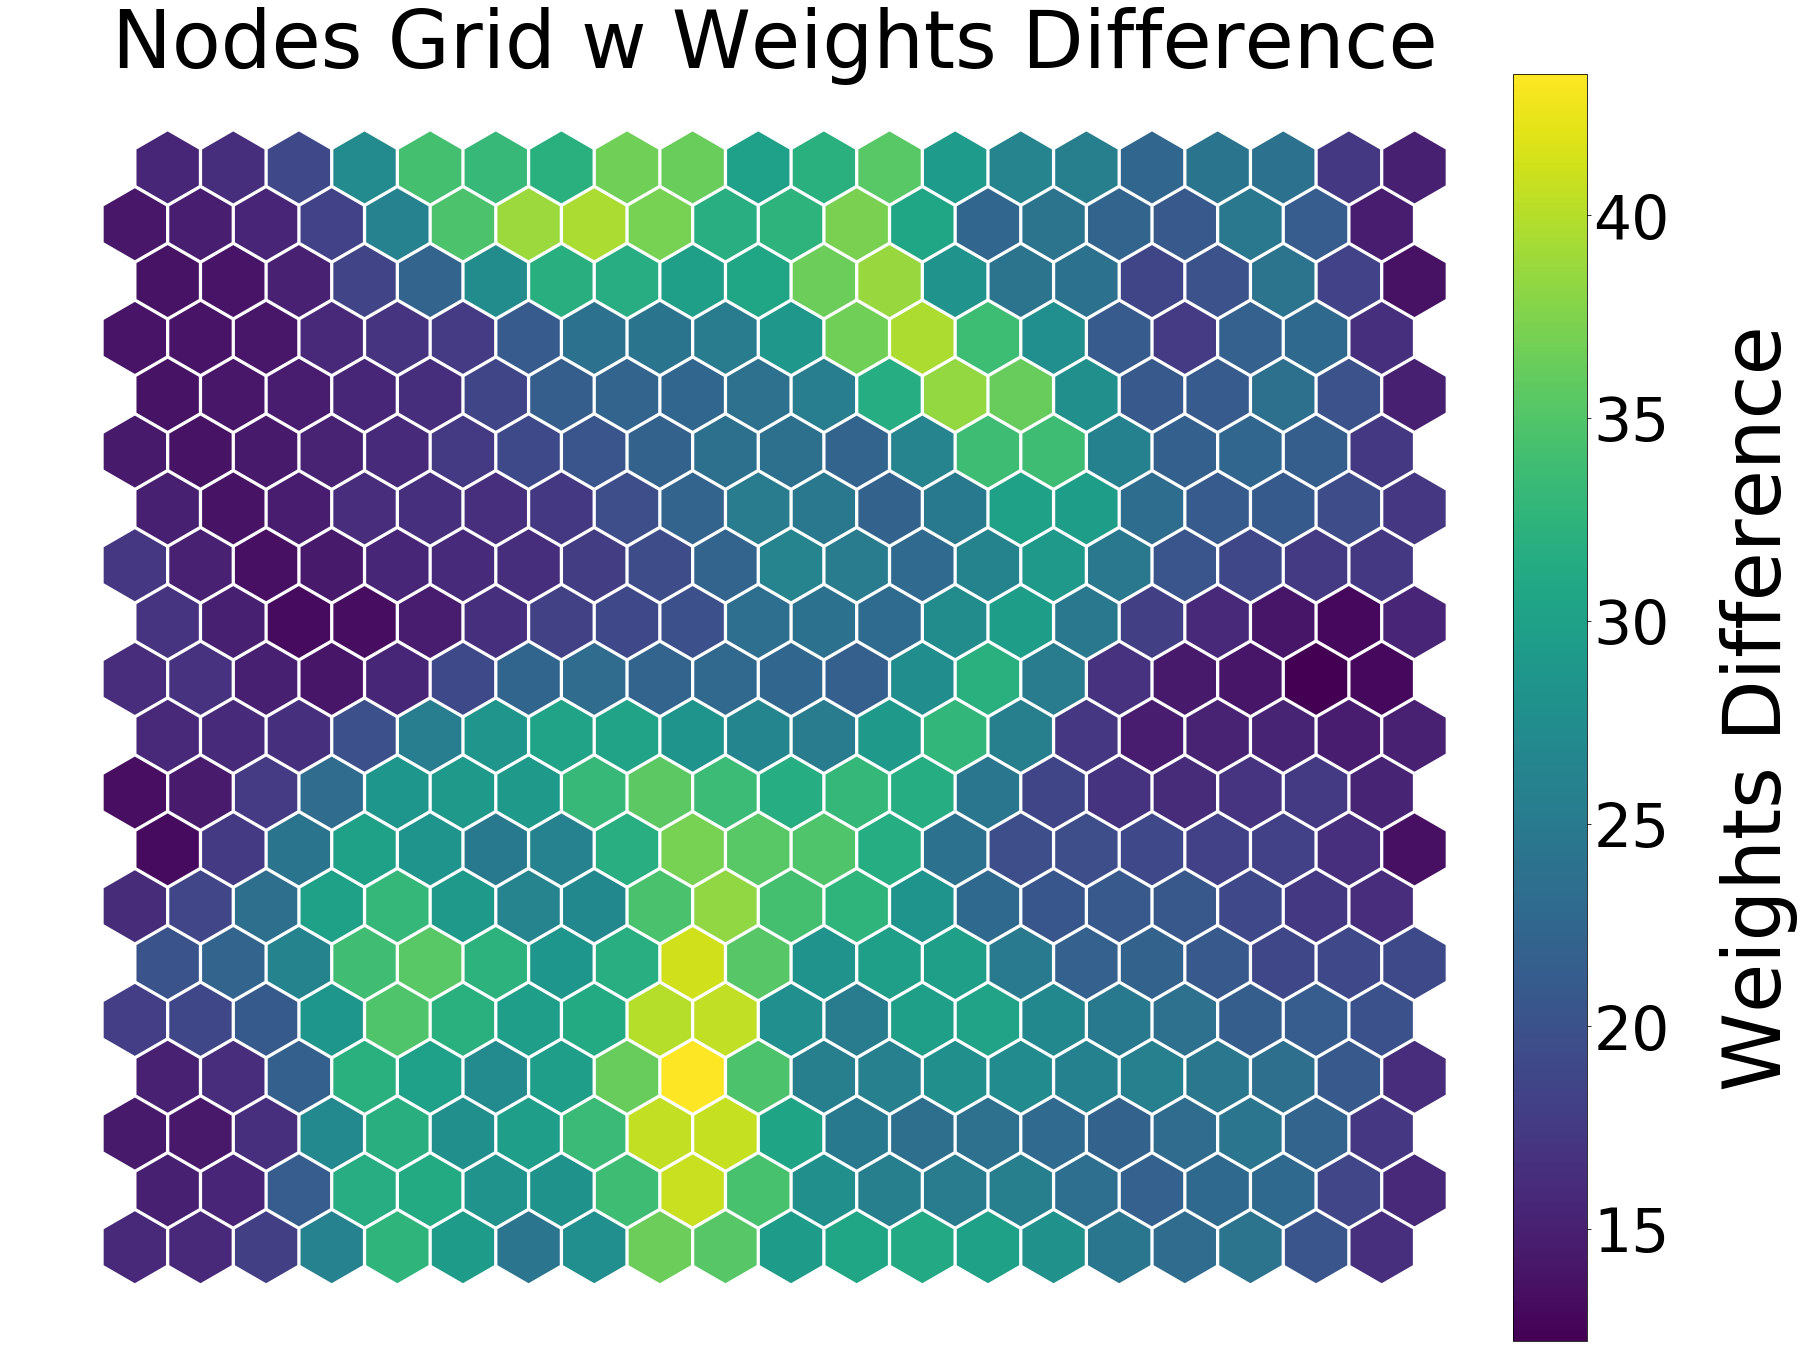

<Figure size 432x288 with 0 Axes>

In [ ]:
# build a network 20x20 with a weights format taken from the train_st and activate Periodic Boundary Conditions. 
som = sps.somNet(20, 20, train_st, PBC=True)

# train it with 0.1 learning rate for 10000 epochs
som.train(0.05, 10000)

# print unified distance matrix
som.diff_graph(show=True, printout=True)

## Visualizing some nodes of the map

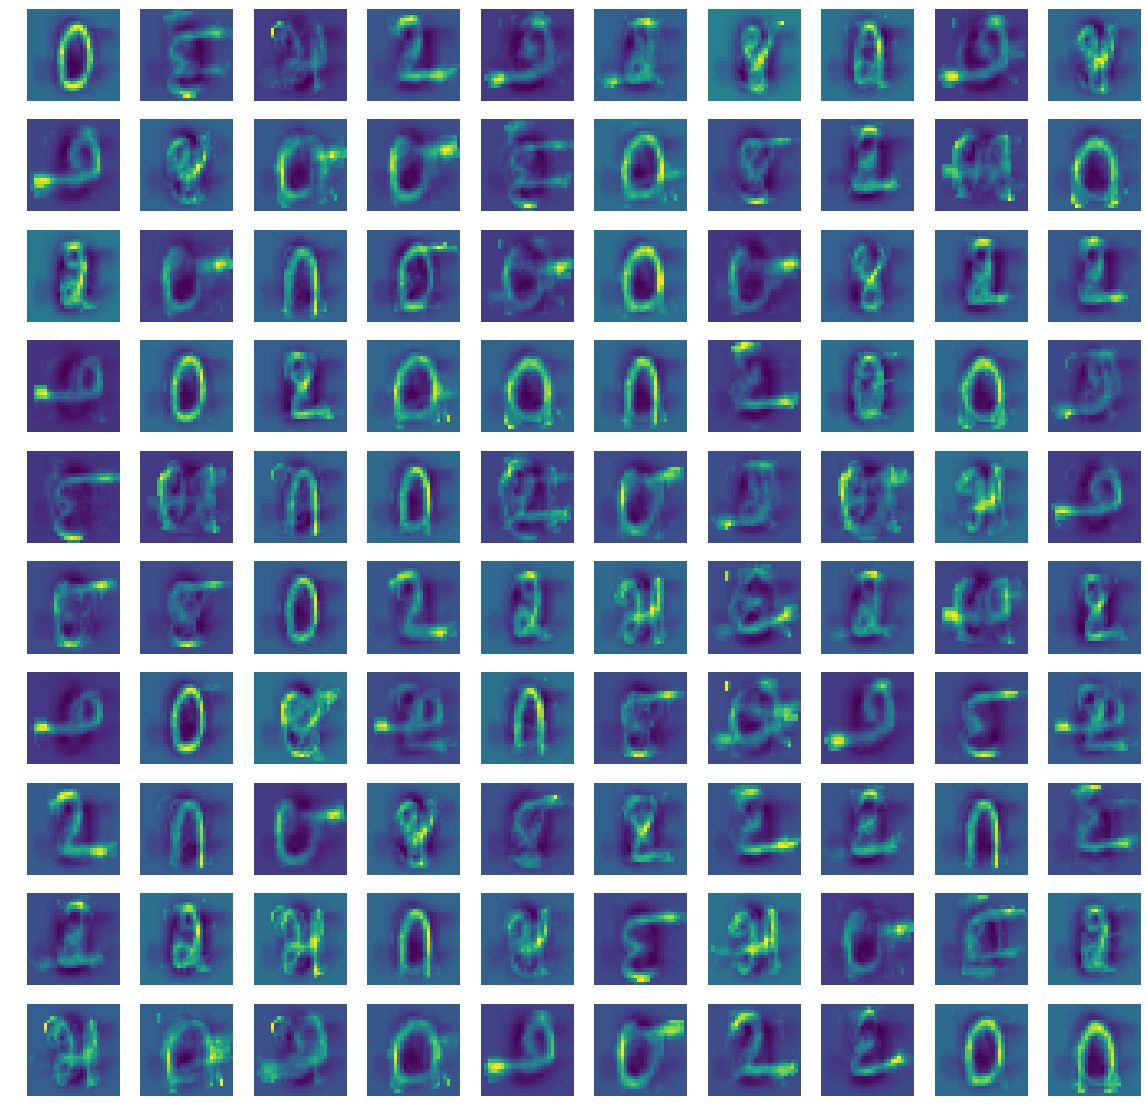

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))
axs = axs.flatten()

some_nodes_indxs = random.sample(range(len(som.nodeList)), len(axs))


for i, ax in enumerate(axs):
    ax.imshow(np.asarray(som.nodeList[some_nodes_indxs[i]].weights).reshape(28,28))
    ax.axis('off')


In [ ]:
# print picked coordinates
', '.join([f'({i // 20}, {i % 20})' for i in some_nodes_indxs])


'(17, 10), (13, 15), (2, 5), (8, 14), (7, 8), (4, 9), (19, 15), (1, 10), (8, 6), (0, 19), (5, 4), (19, 0), (12, 5), (12, 3), (12, 16), (13, 9), (17, 17), (6, 11), (8, 19), (15, 5), (2, 12), (12, 4), (19, 6), (16, 12), (9, 5), (15, 8), (9, 3), (1, 17), (5, 12), (6, 13), (7, 0), (17, 9), (4, 16), (13, 8), (15, 6), (18, 7), (12, 14), (0, 12), (16, 6), (3, 7), (12, 18), (9, 19), (1, 6), (19, 9), (10, 17), (15, 2), (4, 8), (10, 19), (2, 0), (4, 3), (16, 0), (17, 18), (19, 10), (7, 16), (3, 11), (1, 2), (9, 8), (5, 10), (8, 1), (3, 15), (5, 0), (17, 11), (17, 1), (6, 18), (0, 9), (16, 19), (9, 6), (6, 6), (16, 16), (5, 18), (7, 15), (0, 6), (11, 2), (19, 19), (18, 14), (3, 17), (9, 13), (7, 10), (19, 7), (13, 13), (6, 10), (2, 10), (1, 4), (19, 8), (19, 1), (14, 16), (2, 1), (11, 5), (14, 13), (1, 12), (2, 4), (11, 7), (3, 5), (13, 6), (6, 4), (14, 2), (9, 16), (9, 10), (15, 10), (17, 6)'

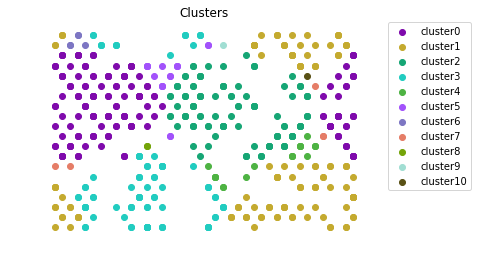

<Figure size 432x288 with 0 Axes>

In [ ]:
som.cluster(train_st, type='qthresh', show=True);